# EDA & RFM ANALYSIS - WILDAN AZIZ

## Overview Projek

Pada projek ini akan menggunakan RFM Analysis pada dataset "Brazilian E-Commerce Public Dataset by Olist"
Dimana RFM Analysis terdiri atas 3 parameter utama yakni
- Recency (R): Seberapa baru pelanggan melakukan transaksi terakhir.
- Frequency (F): Seberapa sering pelanggan melakukan pembelian.
- Monetary (M): Total uang yang dihabiskan oleh pelanggan.

Akhir dari projek ini ditujukan untuk menganalisis serta mengelompokkan pelanggan ke dalam segmen berdasarkan perilaku mereka, dan dengan analisis ini diharapkan membantu dalam strategi pemasaran.

## Mengimpor Library yang digunakan

In [81]:
#Library untuk data processing
import pandas as pd

#Library untuk perhitungan data
import numpy as np

# library untuk visualisasi data
import seaborn as sns

# library untuk visualisasi data
import matplotlib.pyplot as plt

# Mengimpor limbrary date time untuk konversi waktu order
from datetime import timedelta

## Data Loading

In [82]:
order_pelanggan = pd.read_csv("rfm_dataset/olist_orders_dataset.csv")
payment_pelanggan = pd.read_csv("rfm_dataset/olist_order_payments_dataset.csv")

### Melihat informasi pada kedua file dataset

In [83]:
order_pelanggan.info()
payment_pelanggan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  obje

### Melihat data order pelanggan sebanyak 10 baris

dapat dilihat pada order pelanggan terdapat data yang bernilai nan nanti akan dihapus pada bagian data understanding

In [84]:
order_pelanggan.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


### Melihat data payment pelanggan sebanyak 10 baris

dapat dilihat pada payment pelanggan tidak ada data yang bernilai NaN

In [85]:
payment_pelanggan.head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95


## Data Understanding

### Mengetahui tipedata dari kedua file dataset (order_pelanggan dan payment_pelanggan)

In [86]:
order_pelanggan.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [87]:
payment_pelanggan.dtypes

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

### Menghapus missing value dari kedua file dataset

dapat dilihat bahwa untuk file dataset order_pelanggan memiliki banyak nilai NaN sedangkan payment_pelanggan tidak ada nilai NaN

In [88]:
order_pelanggan.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [89]:
payment_pelanggan.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Menghapus missing value

In [90]:
order_pelanggan_clean = order_pelanggan.dropna(subset=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'])

In [91]:
order_pelanggan_clean.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

Setelah dibersihkan data order_pelanggan yang semula 99441 entries menjadi 96461 entries

In [92]:
order_pelanggan_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96461 non-null  object
 1   customer_id                    96461 non-null  object
 2   order_status                   96461 non-null  object
 3   order_purchase_timestamp       96461 non-null  object
 4   order_approved_at              96461 non-null  object
 5   order_delivered_carrier_date   96461 non-null  object
 6   order_delivered_customer_date  96461 non-null  object
 7   order_estimated_delivery_date  96461 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


In [93]:
order_pelanggan_clean.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00
10,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-18 11:40:40,2017-05-29 11:18:31,2017-06-07 00:00:00


### Mengubah date, timestamp dsb. menjadi dalam bentuk datetime format 

In [94]:
order_pelanggan_clean[['order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date']] = order_pelanggan_clean[['order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date']]\
        .apply(lambda x: pd.to_datetime(x,errors = 'coerce', format='%Y-%m-%d %H:%M:%S'))\
        .apply(lambda x: x.dt.date)\
        .astype('datetime64[ns]')

/tmp/ipykernel_76960/258287205.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_pelanggan_clean[['order_purchase_timestamp',


### Mengambil orderan terakhir sebagai analysis

In [95]:
order_terakhir = order_pelanggan_clean['order_delivered_carrier_date'].max() + timedelta(days=1)
order_terakhir

Timestamp('2018-09-12 00:00:00')

### Menggabungkan dua file dataset menjadi satu dataframe

In [96]:
df_group = order_pelanggan_clean.merge(payment_pelanggan, how='inner', on=['order_id'])

### Membuat rfm dengan variabel tertentu

In [97]:
rfm_merge = df_group.groupby('customer_id').agg(
    r = ('order_delivered_carrier_date', lambda x: (order_terakhir - x.max()).days),
    f = ('payment_sequential', 'count'),
    m = ('payment_value', 'sum')
)

In [98]:
rfm_merge.head()

,r,f,m
customer_id,,,
00012a2ce6f8dcda20d059ce98491703,299,1,114.74
000161a058600d5901f007fab4c27140,420,1,67.41
0001fd6190edaaf884bcaf3d49edf079,560,1,195.42
0002414f95344307404f0ace7a26f1d5,389,1,179.35
000379cdec625522490c315e70c7a9fb,161,1,107.01


## EDA (Exploratory Data Analysis)

#### Pada bagian ini akan ada beberapa tujuan yang ingin dicari diantaranya yaitu:
1. Korelasi Antar Variabel untuk RFM
- Tujuannya untuk mengetahui hubungan antara Recency, Frequency dan Monetary
2. Analisis Tren Waktu
- Tujuannya untuk menemukan pola musiman atau tren naik/turun dalam pembelian.
3. Analisis pelanggan unik
- Tujuannya untuk mengidentifikasi apakah jumlah pelanggan unik meningkat atau menurun setiap tahun.

4. Segmentasi Frekuensi Pembeli
- Sebagaimana yang diketahui pada dataset bahwa mayoritas pelanggan adalah pembeli satu kali. Sejalan dengan hal itu segmentasi frekuensi perlu dianalisis lebih mendalam.
Maka dari itu agar mengetahui strategi pemasaran yang baik perlu adanya perancangan yang matang agar meningkatkan pembelian berulang.

### Mendeskripsikan rfm_merge

In [99]:
rfm_merge.describe()

,r,f,m
count,96460.000000,96460.000000,96460.000000
mean,250.422662,1.044360,159.855721
std,152.568149,0.369635,218.828474
min,1.000000,1.000000,9.590000
25%,127.000000,1.000000,61.880000
50%,231.000000,1.000000,105.280000
75%,359.000000,1.000000,176.330000
max,704.000000,26.000000,13664.080000


### Korelasi Heatmap Antar Variabel untuk RFM

Dapat dilihat dari heatmap korelasi bahwa nilai korelasi antar variabel r, f, dan m sangat rendah. Hal ini juga sejalan dengan prinsip dari RFM dimana RFM didesain untuk menangkap dimensi berbeda dari perilaku pelanggan. Oleh karena itu, korelasi rendah diharapkan.



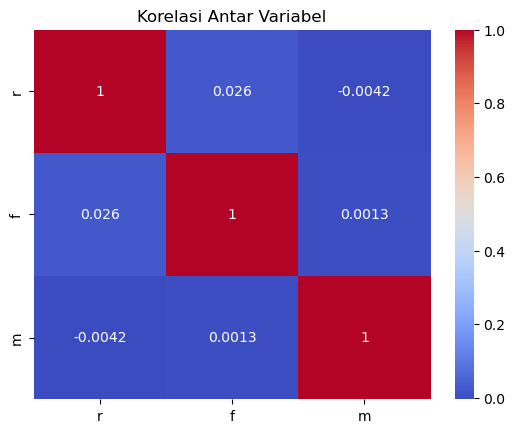

In [100]:
# Heatmap untuk korelasi
corr = rfm_merge[['r', 'f', 'm']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Korelasi Antar Variabel")
plt.show()

### Analisis Tren Waktu Pembelian Pelanggan

/tmp/ipykernel_76960/3083370942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_pelanggan_clean['month'] = order_pelanggan_clean['order_purchase_timestamp'].dt.to_period('M')


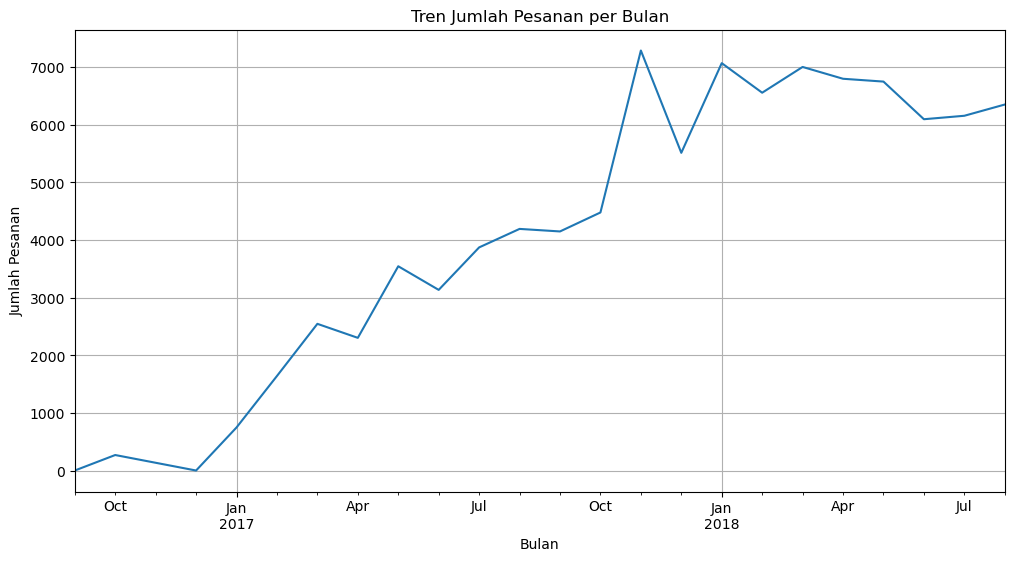

In [101]:
# Tren pembelian per bulan
order_pelanggan_clean['month'] = order_pelanggan_clean['order_purchase_timestamp'].dt.to_period('M')
monthly_trend = order_pelanggan_clean.groupby('month').size()

plt.figure(figsize=(12, 6))
monthly_trend.plot(kind='line')
plt.title('Tren Jumlah Pesanan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan')
plt.grid(True)
plt.show()

### Analisis Retensi Pelanggan Setiap Tahun

/tmp/ipykernel_76960/954504183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_pelanggan_clean['year'] = order_pelanggan_clean['order_purchase_timestamp'].dt.year


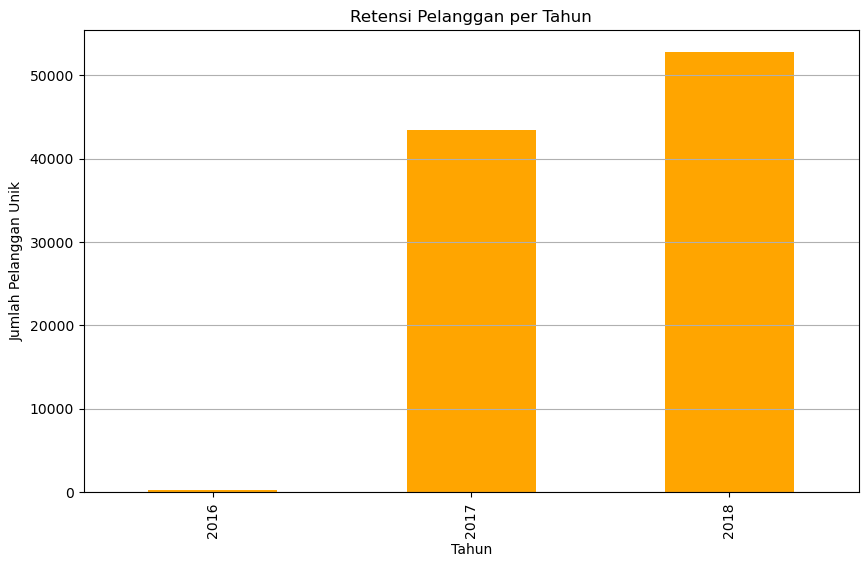

In [102]:
# Retensi pelanggan berdasarkan tahun
order_pelanggan_clean['year'] = order_pelanggan_clean['order_purchase_timestamp'].dt.year
customer_retention = order_pelanggan_clean.groupby('year')['customer_id'].nunique()

plt.figure(figsize=(10, 6))
customer_retention.plot(kind='bar', color='orange')
plt.title('Retensi Pelanggan per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pelanggan Unik')
plt.grid(axis='y')
plt.show()

### Segmentasi Frekuensi Pembeli

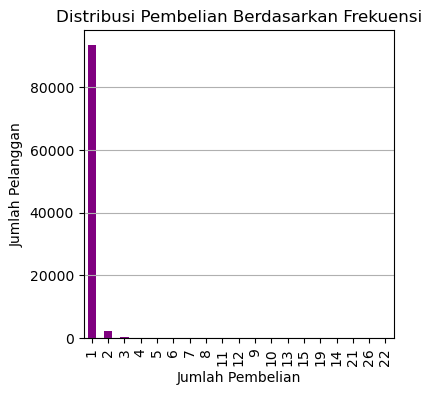

In [103]:
# Distribusi pembeli berdasarkan frekuensi
frequency_dist = rfm_merge['f'].value_counts()

plt.figure(figsize=(4, 4))
frequency_dist.plot(kind='bar', color='purple')
plt.title('Distribusi Pembelian Berdasarkan Frekuensi')
plt.xlabel('Jumlah Pembelian')
plt.ylabel('Jumlah Pelanggan')
plt.grid(axis='y')
plt.show()

### Persebaran 'R' Recency dan 'M' Monetary

/tmp/ipykernel_76960/1000376332.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_merge.r, kde=False, bins = 50)


<Axes: title={'center': 'Recency (days from last order)'}, xlabel='r'>

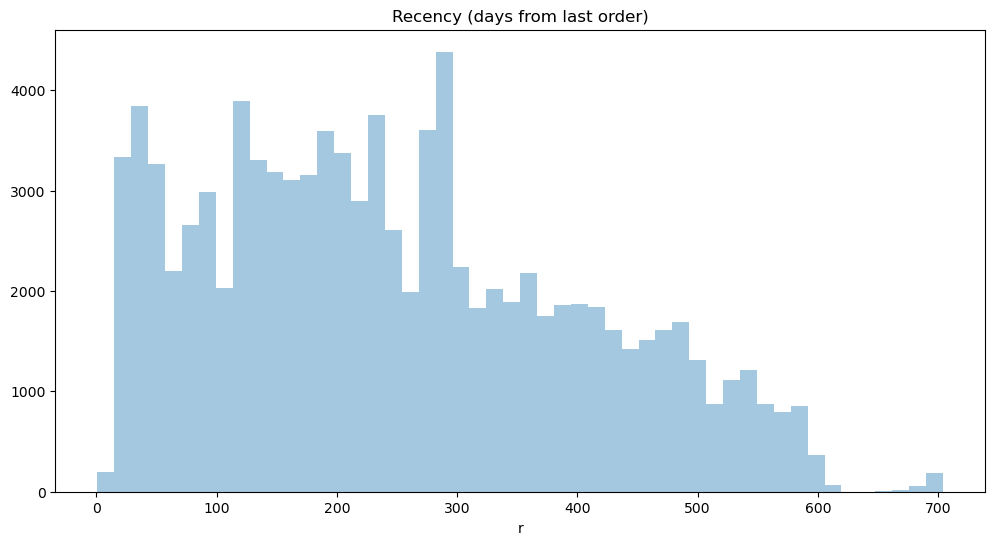

In [104]:
plt.figure(figsize=(12, 6))
plt.title('Recency (days from last order)')
sns.distplot(rfm_merge.r, kde=False, bins = 50)

/tmp/ipykernel_76960/2360917965.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_merge.m[rfm_merge.m < np.quantile(a = rfm_merge.m, q=0.99)], kde = False)


<Axes: title={'center': 'Monetary'}, xlabel='m'>

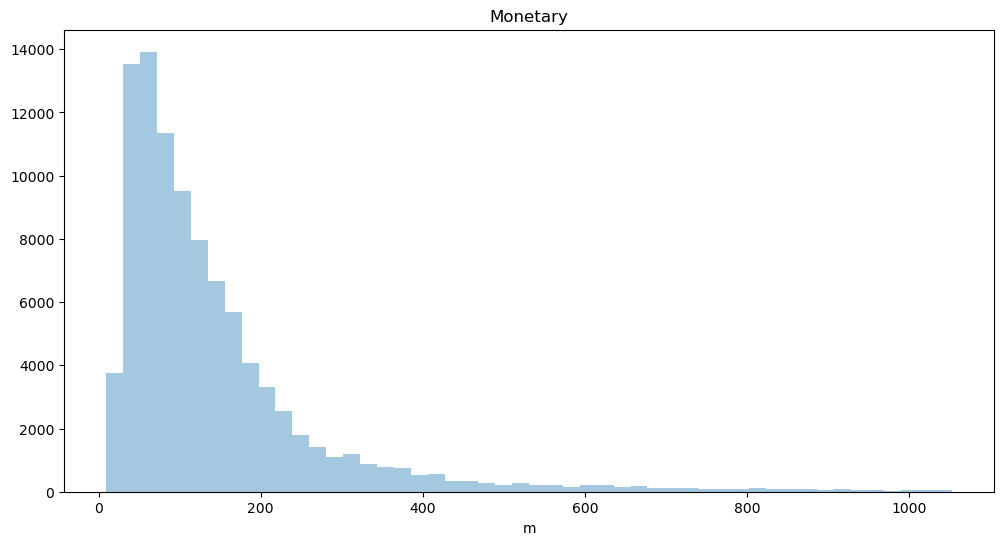

In [105]:
plt.figure(figsize=(12, 6))
plt.title('Monetary')
sns.distplot(rfm_merge.m[rfm_merge.m < np.quantile(a = rfm_merge.m, q=0.99)], kde = False)


## RFM Analysis

Pada RFM analysis ini setidaknya ada beberapa tujuan yang ingin dicapai yakni:

1. Segmentasi Pelanggan

    RFM (Recency, Frequency, Monetary) analysis digunakan untuk mengelompokkan pelanggan berdasarkan perilaku mereka:
    - Recency (R): Seberapa baru pelanggan terakhir kali melakukan transaksi.
    - Frequency (F): Seberapa sering pelanggan melakukan transaksi.
    - Monetary (M): Seberapa banyak uang yang telah dikeluarkan pelanggan dalam total transaksi.
    
    Dengan menggunakan RFM, pelanggan dikelompokkan ke dalam kategori-kategori seperti:
    - Churned: Pelanggan yang sudah lama tidak bertransaksi.
    - Newest: Pelanggan baru.
    - Loyal: Pelanggan setia yang sering berbelanja.
    - Big Spenders: Pelanggan yang menghabiskan banyak uang.
    - Soon to Churn: Pelanggan yang jarang melakukan transaksi dan berpotensi untuk pergi.

2. Identifikasi Kondisi Pelanggan

    Dengan segmentasi RFM, kita dapat mengidentifikasi kondisi pelanggan saat ini dan memahami:
    - Siapa pelanggan paling berharga (VIP).
    - Pelanggan yang sudah tidak aktif (churned).
    - Pelanggan yang hanya bertransaksi sekali.
    - Pelanggan yang mungkin akan berhenti berbelanja.

3. Strategi Pemasaran yang Tepat Sasaran

    Hasil RFM analysis membantu perusahaan merancang strategi pemasaran yang lebih efektif dan tertarget, seperti:
    - Retensi Pelanggan: Memberikan insentif atau penawaran khusus untuk pelanggan yang berpotensi churn.
    - Promosi ke Pelanggan Loyal: Memberikan penghargaan atau program loyalitas kepada pelanggan setia.
    - Reaktivasi Pelanggan Lama: Menarik pelanggan lama yang sudah churned dengan diskon atau penawaran spesial.
    - Konversi Pelanggan Baru: Mendorong pelanggan baru untuk bertransaksi lebih sering.

### Membagi R dan M menjadi tiga segment serta menetapkan nilai F menjadi 1 dan 2

In [106]:
quants = {'r': rfm_merge.r.quantile([.33, .66]).values,
          'f': np.array([1, 2]),
          'm': rfm_merge.m.quantile([.33, .66]).values
         }

In [107]:
quant_table = pd.DataFrame (quants, columns = ['r','f','m'])

### Membuat fungsi untuk mencari nilai RFM

In [108]:
def rfm_segment(x, col):
    if col in ['f', 'm']:
        if x <= quant_table[col].iloc[0]:
            return(1)
        if (x > quant_table[col].iloc[0]) and (x <= quant_table[col].iloc[1]):
            return(2)
        else:
            return(3)
    if col in ['r']:
        if x <= quant_table[col].iloc[0]:
            return(3)
        if (x > quant_table[col].iloc[0]) and (x <= quant_table[col].iloc[1]):
            return(2)
        else:
            return(1)  

### Mencari nilai gabungan RFM Score

In [109]:
for columns in rfm_merge.columns:
    rfm_merge[f'{columns}-segment'] = rfm_merge[columns].apply(lambda x: rfm_segment(x, columns))

In [110]:
rfm_merge['rfm-score'] = rfm_merge['r-segment'].apply(str) + rfm_merge['f-segment'].apply(str) + rfm_merge['m-segment'].apply(str)
rfm_merge

,r,f,m,r-segment,f-segment,m-segment,rfm-score
customer_id,,,,,,,
00012a2ce6f8dcda20d059ce98491703,299,1,114.74,2,1,2,212
000161a058600d5901f007fab4c27140,420,1,67.41,1,1,1,111
0001fd6190edaaf884bcaf3d49edf079,560,1,195.42,1,1,3,113
0002414f95344307404f0ace7a26f1d5,389,1,179.35,1,1,3,113
000379cdec625522490c315e70c7a9fb,161,1,107.01,3,1,2,312
...,...,...,...,...,...,...,...
fffcb937e9dd47a13f05ecb8290f4d3e,179,1,91.91,2,1,2,212
fffecc9f79fd8c764f843e9951b11341,165,3,81.36,2,3,2,232
fffeda5b6d849fbd39689bb92087f431,110,1,63.13,3,1,1,311


### Menghapus kolom RFM untuk melakukan Segmentasi berikutnya

In [111]:
rfm_merge_seg = rfm_merge.reset_index().groupby(['rfm-score','r-segment','f-segment','m-segment'], as_index = False).agg({'customer_id':'count'})
rfm_merge_seg

,rfm-score,r-segment,f-segment,m-segment,customer_id
0,111,1,1,1,10446
1,112,1,1,2,10630
2,113,1,1,3,10512
3,121,1,2,1,323
4,122,1,2,2,305
5,123,1,2,3,296
6,131,1,3,1,93
7,132,1,3,2,94
8,133,1,3,3,64
9,211,2,1,1,10331


### Membuat fungsi segmentasi

In [112]:
def segmentasi(x):
    if x in ['333', '323']:
        return('TERBAIK')  # BEST
    if x in ['223','233']:
        return('PELANGGAN PENGELUARAN TERBESAR')
    if x in ['111','112','113']:
        return('HILANG')  
    if x in ['321','322','331','332']:
        return('PELANGGAN SETIA')
    if x in ['311','312','313']:
        return('PELANGGAN BARU')
    if x in ['231','232']:
        return('DULU SERING BELANJA') 
    if x in ['131','132','133']:
        return('DULU SETIA') 
    if x in ['211','212','213']:
        return('PELANGGAN BARU SATU KALI BELANJA')
    if x in ['221','222']:
        return('NORMAL')
    if x in ['121','122','123']:
        return('SEGERA HILANG') 


### Menerapkan segmentasi kedalam rfm-score

In [113]:
rfm_merge['customer_type'] = rfm_merge['rfm-score'].apply(segmentasi)
rfm_merge_seg['customer_type'] = rfm_merge_seg['rfm-score'].apply(segmentasi)
rfm_merge.reset_index().groupby(['customer_type']).agg({'r':'mean', 'f':'mean','m':'mean'})

,r,f,m
customer_type,,,
DULU SERING BELANJA,232.582609,4.243478,70.726783
DULU SETIA,431.936255,4.784861,134.120956
HILANG,428.106464,1.000000,160.939929
NORMAL,232.200811,2.000000,74.690832
PELANGGAN BARU,88.179846,1.000000,164.345061
PELANGGAN BARU SATU KALI BELANJA,231.384175,1.000000,153.733543
PELANGGAN PENGELUARAN TERBESAR,230.094545,2.345455,335.618836
PELANGGAN SETIA,91.326376,2.445920,75.740607
SEGERA HILANG,430.886364,2.000000,170.330952


### EDA sederhana untuk memahami distribusi pelanggan berdasarkan tipe loyalitas atau perilaku belanja

mengambil jumlah dari customer_id dan menyimpannya pada kolom 'pengguna'
mencari tahu persentase dari 'pengguna' dan menyimpannya pada kolom 'persentase_pengguna'

##### Dapat dilihat dari output distribusi tersebut bahwa

1. **Churned (32.78%)**  
   Sekitar **1/3 dari pengguna** sudah keluar (*churned*).  
   Ini menunjukkan adanya **masalah retensi pelanggan**, di mana bisnis kehilangan pelanggan secara signifikan dan belum berhasil mempertahankannya.

2. **Newest dan Recent One-Timers (32.47% + 31.77%)**  
   Sekitar **2/3 dari pengguna** adalah pendatang baru atau hanya melakukan **satu kali transaksi**.  
   Ini berarti ada banyak **traffic** tetapi **konversi** menjadi pelanggan loyal masih sangat rendah.  

   **Strategi Re-Engagement:**  
   - Fokus pada **program onboarding** pelanggan baru.  
   - Berikan **penawaran khusus** atau **diskon transaksi kedua** untuk mendorong pembelian berikutnya.  
   - Gunakan **kampanye email** atau **program referral** agar mereka tertarik kembali bertransaksi.  

3. **Loyal, Normal, dan Returning Customers (~3% total)**  
   Hanya sebagian kecil pengguna (**~3%**) yang **setia** atau **aktif kembali** melakukan transaksi.  
   Ini menunjukkan adanya **kesulitan dalam mempertahankan pelanggan** untuk melakukan pembelian berulang.  

   **Strategi Menanggulangi:**  
   - Implementasikan **program loyalitas pelanggan** seperti sistem poin atau reward.  
   - Tawarkan **insentif eksklusif** untuk pelanggan setia, seperti diskon spesial atau akses prioritas.  
   - Bangun hubungan jangka panjang dengan meningkatkan **customer experience** melalui pelayanan yang lebih baik.  


In [114]:
dist_rfm = rfm_merge.reset_index().groupby(['customer_type'], as_index = False).agg({'customer_id':'count'}).rename(columns={'customer_id':'pengguna'})
dist_rfm['persentase_pengguna'] = dist_rfm['pengguna'] * 100 / dist_rfm.pengguna.sum()
dist_rfm.sort_values(by='persentase_pengguna', ascending = False)

,customer_type,pengguna,persentase_pengguna
2,HILANG,31588,32.747253
4,PELANGGAN BARU,31399,32.551317
5,PELANGGAN BARU SATU KALI BELANJA,30598,31.720921
8,SEGERA HILANG,924,0.957910
7,PELANGGAN SETIA,527,0.546340
3,NORMAL,493,0.511093
9,TERBAIK,290,0.300643
6,PELANGGAN PENGELUARAN TERBESAR,275,0.285092
1,DULU SETIA,251,0.260211
0,DULU SERING BELANJA,115,0.119220
